In [ ]:
# F train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at F line only
F_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('F')]

In [4]:
# look at all station names
F_train_all['STATION'].unique()

array(['14 ST', '15 ST-PROSPECT', '169 ST', '18 AV', '2 AV',
       '21 ST-QNSBRIDGE', '34 ST-HERALD SQ', '4 AV-9 ST',
       '42 ST-BRYANT PK', '47-50 STS ROCK', '4AV-9 ST', '5 AVE', '6 AV',
       '7 AV', '74 ST-BROADWAY', '75 AV', 'AVENUE I', 'AVENUE N',
       'AVENUE P', 'AVENUE U', 'AVENUE X', "B'WAY-LAFAYETTE", 'BAY PKWY',
       'BERGEN ST', 'BLEECKER ST', 'BRIARWOOD', 'CARROLL ST', 'CHURCH AV',
       'CONEY IS-STILLW', 'DELANCEY/ESSEX', 'DITMAS AV', 'EAST BROADWAY',
       'FOREST HILLS 71', 'FT HAMILTON PKY', 'JAMAICA 179 ST',
       'JAY ST-METROTEC', 'JKSN HT-ROOSVLT', 'KEW GARDENS', 'KINGS HWY',
       'LEXINGTON AV/63', 'NEPTUNE AV', 'PARSONS BLVD', 'ROOSEVELT ISLND',
       'SMITH-9 ST', 'SUTPHIN BLVD', 'W 4 ST-WASH SQ', 'W 8 ST-AQUARIUM',
       'YORK ST'], dtype=object)

In [5]:
# check station count
F_train_all['STATION'].count()

49

In [7]:
# needs further cleaning
F_train_all["STATION"].replace("74 ST-BROADWAY", value="JKSN HT-ROOSVLT", inplace=True)
F_train_all["STATION"].replace("5 AVE", value="42 ST-BRYANT PK", inplace=True)
F_train_all["STATION"].replace("BLEECKER ST", value="B'WAY-LAFAYETTE", inplace=True)
F_train_all["STATION"].replace("4AV-9 ST", value="4 AV-9 ST", inplace=True)

In [12]:
# now sum same name rows
F_commuters = F_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
F_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
14 ST,5370.0,7648.0
15 ST-PROSPECT,3160.0,578.0
169 ST,7302.0,1477.0
18 AV,2050.0,315.0
2 AV,2035.0,2595.0


In [10]:
# order stations in excel
# save as csv
F_commuters.to_csv('F_commuters.csv')

In [13]:
# open ordered CSV
csv_path_F = 'F_commuters_order.csv'
F_commuters_order = pd.read_csv(csv_path_F, encoding="utf-8")
F_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,JAMAICA 179 ST,22470,1836
1,169 ST,7302,1477
2,PARSONS BLVD,5275,1483
3,SUTPHIN BLVD,6212,1035
4,BRIARWOOD,3372,447


In [14]:
F_commuters_order['AM_AVG_ENTER'] = F_commuters_order['AM_ENTERS']/5

In [15]:
F_commuters_order['AM_AVG_EXIT'] = F_commuters_order['AM_EXITS']/5
F_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,JAMAICA 179 ST,22470,1836,4494.0,367.2
1,169 ST,7302,1477,1460.4,295.4
2,PARSONS BLVD,5275,1483,1055.0,296.6
3,SUTPHIN BLVD,6212,1035,1242.4,207.0
4,BRIARWOOD,3372,447,674.4,89.4


In [16]:
# order stations in excel
# save as csv
F_commuters_order.to_csv('F_commuters_final.csv')

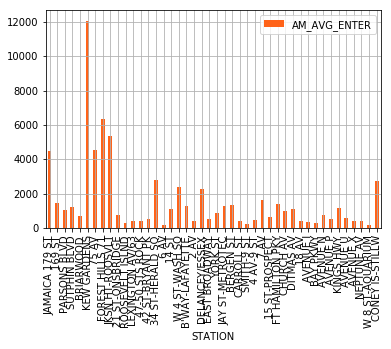

In [17]:
# graph F Train AM AVG ENTERS
plt = F_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FF6319')
plt.grid()

# save the fig
plt.figure.savefig('F-AM-enter.pdf')

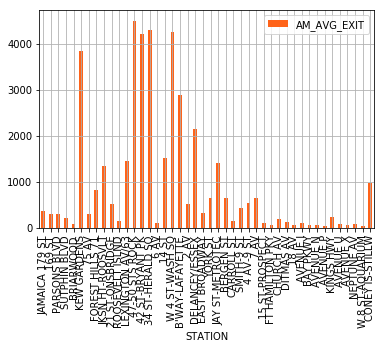

In [18]:
# graph F Train AM AVG EXITS
plt = F_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FF6319')
plt.grid()


# save the fig
plt.figure.savefig('F-AM-exit.pdf')